In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ELG-IMDB.csv')

In [3]:
print(df)

          Const  Your Rating  Date Rated                           Title  \
0     tt0198781            6  2025-03-10                  Monsters, Inc.   
1     tt1453405            7  2025-03-10             Monsters University   
2     tt2294629            7  2025-03-10                          Frozen   
3     tt0382932            7  2025-03-10                     Ratatouille   
4    tt22022452            7  2025-03-10                    Inside Out 2   
..          ...          ...         ...                             ...   
146   tt0038854            9  2024-10-11  The Postman Always Rings Twice   
147   tt0114814            7  2024-10-11              The Usual Suspects   
148   tt0099685           10  2024-10-10                      Goodfellas   
149   tt0435761            8  2024-04-25                     Toy Story 3   
150   tt0044741            9  2024-04-24                           Ikiru   

                     Original Title                                    URL  \
0        

In [21]:
genre_counts = df.groupby('Genres').size().reset_index(name='Count')

individual_genres = {}
for count in genre_counts['Genres']:
    split_count = count.split(',')
    for genre in split_count:
        if genre in individual_genres:
            individual_genres[genre] += 1
        else:
            individual_genres[genre] = 1
print(individual_genres)
individual_genres_series = pd.Series(individual_genres)

individual_genres_df = individual_genres_series.reset_index()

individual_genres_df.columns = ['Genre', 'Frequency']

individual_genres_df = individual_genres_df.sort_values(by='Frequency', ascending=False)


{'Action': 24, ' Adventure': 59, ' Comedy': 43, ' Sci-Fi': 33, ' Fantasy': 43, ' Drama': 35, ' Thriller': 18, ' Crime': 10, ' Mystery': 13, ' Family': 39, 'Adventure': 7, ' Action': 29, ' Romance': 9, 'Animation': 30, ' Music': 3, ' Musical': 8, 'Biography': 2, ' History': 1, 'Comedy': 8, ' Horror': 4, ' War': 1, 'Crime': 9, ' Biography': 2, ' Film-Noir': 1, 'Drama': 8, ' Sport': 1, 'Family': 1, 'Fantasy': 5, 'Musical': 3, 'Mystery': 3, 'Romance': 2, 'Sci-Fi': 9, 'Thriller': 2, 'War': 1}


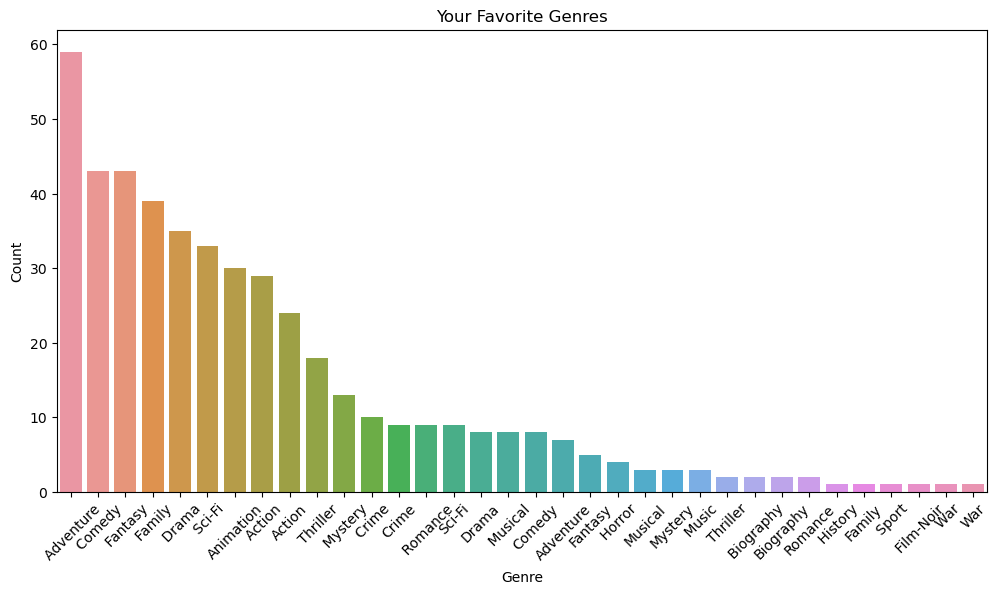

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre',y='Frequency', data = individual_genres_df)
plt.title('Your Favorite Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [43]:
your_ratings = df.groupby('Your Rating').size().reset_index(name='Count')
your_ratings = your_ratings.sort_values(by='Count', ascending=False)

df_clone = df.copy()
df_clone["IMDb Rating"] = np.floor(df_clone['IMDb Rating'])

IMDB_ratings = df_clone.groupby('IMDb Rating').size().reset_index(name='Count')
IMDB_ratings = IMDB_ratings.sort_values(by='Count', ascending=False)



print(IMDB_ratings)

   IMDb Rating  Count
2          7.0     74
3          8.0     46
1          6.0     27
4          9.0      3
0          5.0      1


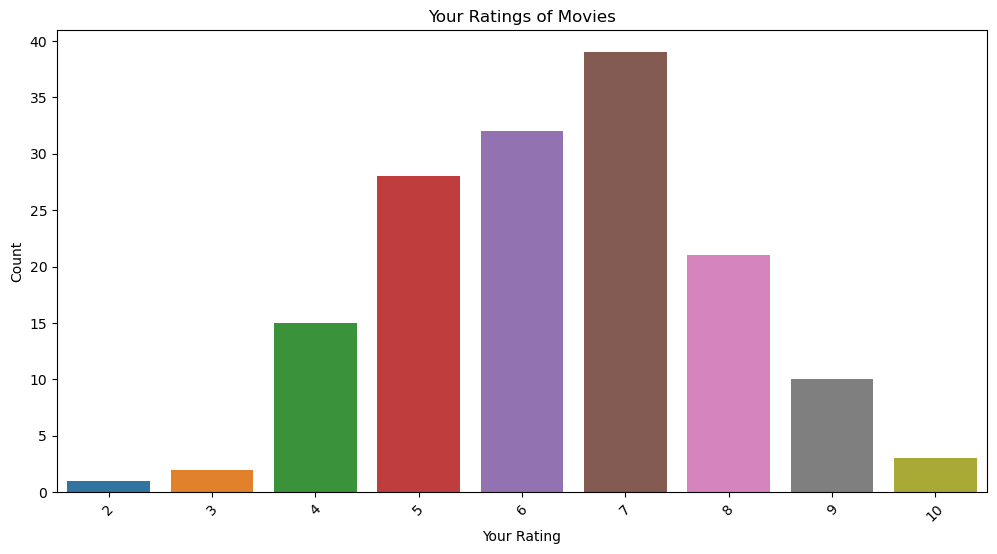

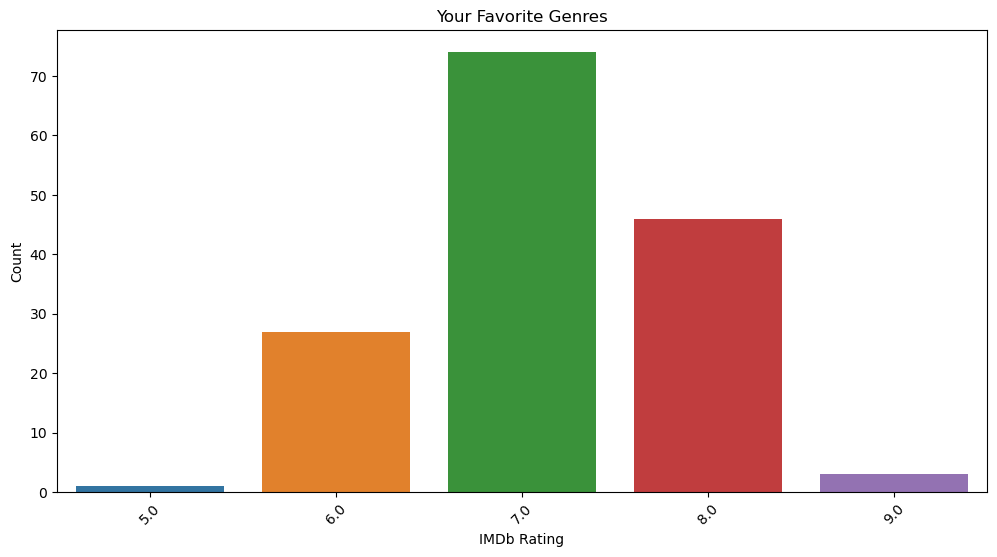

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Your Rating',y='Count', data = your_ratings)
plt.title('Your Ratings of Movies')
plt.xlabel('Your Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='IMDb Rating',y='Count', data = IMDB_ratings)
plt.title('Your Favorite Genres')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [72]:
director_counts = df.groupby('Directors').size().reset_index(name='Count')

individual_directors = {}
print(director_counts['Count'])
for count in director_counts['Directors']:
    split_count = count.split(',')
    for director in split_count:
        if director in individual_genres:
            individual_directors[director] += 1
        else:
            count_value = director_counts.loc[director_counts['Directors'] == director, 'Count']
            individual_directors[director] = count_value.iloc[0] if not count_value.empty else 1
            
individual_directors_series = pd.Series(individual_directors)

individual_directors_df = individual_directors_series.reset_index()

individual_directors_df.columns = ['Director', 'Frequency']

individual_directors_df = individual_directors_df.sort_values(by='Frequency', ascending=False)

0      1
1      1
2      1
3      1
4      1
      ..
101    1
102    1
103    4
104    1
105    1
Name: Count, Length: 106, dtype: int64


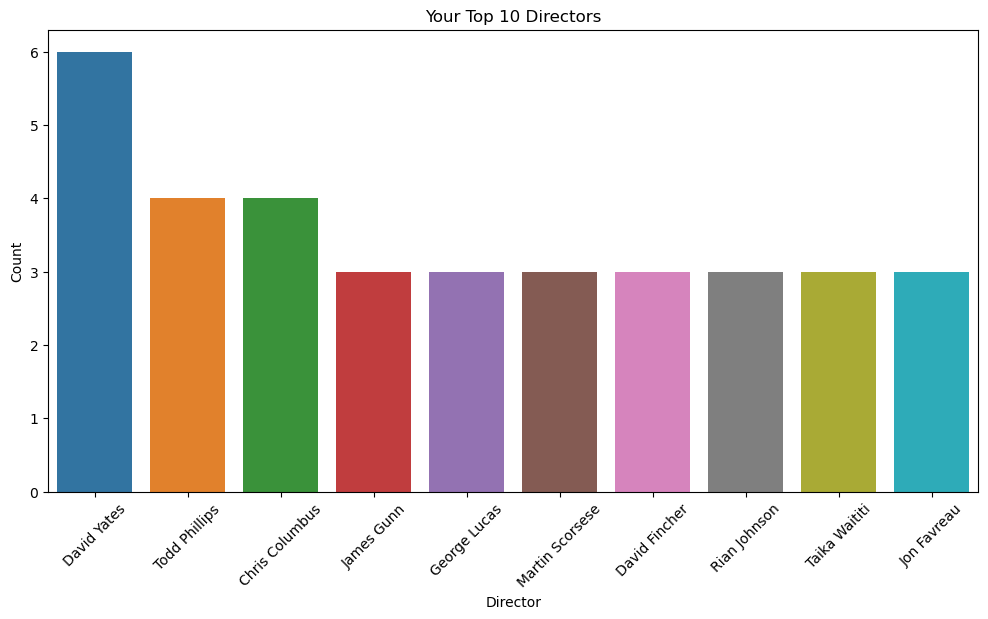

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Director',y='Frequency', data = individual_directors_df.head(10))
plt.title('Your Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [78]:
avg_rating = df['Your Rating'].mean()
avg_IMDB_rating = df['IMDb Rating'].mean()
print(avg_IMDB_rating," your",avg_rating)

total_watch_time = df['Runtime (mins)'].sum()
print(total_watch_time)

7.620529801324502  your 6.364238410596027
18711


In [99]:
unsorted_underrated = {df['Title'][i]: df['Your Rating'][i] - df['IMDb Rating'][i] for i in range(5)}
underrated = sorted(unsorted_underrated.items(), key=operator.itemgetter(1))
for index, row in df.iterrows():
    diff = df['Your Rating'][index] - df['IMDb Rating'][index]
    
    min_underrated = underrated[0][1]
    if diff > min_underrated:

        underrated.pop(0)

        underrated.append((row.Title, diff))

        underrated.sort(key=operator.itemgetter(1))

print(underrated)
    
unsorted_overrated = {df['Title'][i]: df['Your Rating'][i]*-1 + df['IMDb Rating'][i] for i in range(5)}
overrated = sorted(unsorted_overrated.items(), key=operator.itemgetter(1))
for index, row in df.iterrows():
    diff = df['Your Rating'][index]*-1 + df['IMDb Rating'][index]
    
    min_overrated = underrated[0][1]
    if diff > min_underrated:

        overrated.pop(0)

        overrated.append((row.Title, diff))

        overrated.sort(key=operator.itemgetter(1))

print(overrated)

[('The Truman Show', 0.8000000000000007), ('Taxi Driver', 0.8000000000000007), ('Real Steel', 0.9000000000000004), ('Goodfellas', 1.3000000000000007), ('The Postman Always Rings Twice', 1.5999999999999996)]
[('The Usual Suspects', 1.5), ('The Great Gatsby', 3.2), ('Star Wars: Episode IX - The Rise of Skywalker', 3.4000000000000004), ('Harry Potter and the Goblet of Fire', 3.7), ('The Lion King', 3.8)]


In [106]:
last_movie_rated = {df['Title'][0]: df['Date Rated'][0]}
print(last_movie_rated)

first_movie_rated = {df['Title'][len(df)-1]: df['Date Rated'][len(df)-1]}
print(first_movie_rated)

avg_difference = (df['Your Rating'].sum()-df['IMDb Rating'].sum())/(len(df))
print (avg_difference)

{'Monsters, Inc.': '2025-03-10'}
{'Ikiru': '2024-04-24'}
-1.2562913907284756


In [105]:
movies_df = df[df["Title Type"] == "Movie"]

movie_length_stats = {
    "Shortest Movie": movies_df.loc[movies_df["Runtime (mins)"].idxmin(), ["Title", "Runtime (mins)"]].to_dict(),
    "Longest Movie": movies_df.loc[movies_df["Runtime (mins)"].idxmax(), ["Title", "Runtime (mins)"]].to_dict(),
    "Average Length": movies_df["Runtime (mins)"].mean()
}

print(movie_length_stats)

{'Shortest Movie': {'Title': 'Beauty and the Beast', 'Runtime (mins)': 84}, 'Longest Movie': {'Title': "Zack Snyder's Justice League", 'Runtime (mins)': 242}, 'Average Length': 124.97986577181209}
